In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.matplotlib.rcParams['figure.figsize']=(20,14)
plt.matplotlib.rcParams['font.size']=16

In [2]:
dat = pd.read_csv('plot_extracted_data',names=['Temp','ratio'],sep='\t')

In [3]:
def ratio(T9):
    return np.interp(T9,dat['Temp'].values,dat['ratio'].values)

In [4]:
def tri_alp99(T9):
    RATE12A = 2.43*10**9 *T9**(-2/3) *np.exp(-13.490*T9**(-1/3) - (T9/0.15)**2) *(1 + 74.5*T9) + 6.09*10**5 *T9**(-3/2) * np.exp(-1.054/T9)
    RATE12B = 2.76*10**7 *T9**(-2/3) *np.exp(-23.570*T9**(-1/3) - (T9/0.4)**2) * (1 + 5.47*T9 + 326*T9**2) + 130.7*T9**(-3/2) *np.exp(-3.338/T9) +2.51*10**4 *T9**(-3/2) *np.exp(-20.307/T9)
    RATE12 = RATE12A*RATE12B
    if T9 <= 0.03:
        RATE12 = RATE12*3.07*10**(-16) *(1 - 29.1*T9 +1308*T9**2)
    else:
        RATE12 = RATE12*3.44*10**(-16) *(1 + 0.0158*T9**(-0.65))
    return RATE12
def tri_alp16(T9):
    RATE12A = 2.43*10**9 *T9**(-2/3) *np.exp(-13.490*T9**(-1/3) - (T9/0.15)**2) *(1 + 74.5*T9) + 6.09*10**5 *T9**(-3/2) * np.exp(-1.054/T9)
    RATE12B = 2.76*10**7 *T9**(-2/3) *np.exp(-23.570*T9**(-1/3) - (T9/0.4)**2) * (1 + 5.47*T9 + 326*T9**2) + 130.7*T9**(-3/2) *np.exp(-3.338/T9) +2.51*10**4 *T9**(-3/2) *np.exp(-20.307/T9)
    RATE12 = RATE12A*RATE12B
    if T9 <= 0.03:
        RATE12 = RATE12*3.07*10**(-16) *(1 - 29.1*T9 +1308*T9**2)
    else:
        RATE12 = RATE12*3.44*10**(-16) *(1 + 0.0158*T9**(-0.65))
    if T9 <= 0.1:
        RATE12 = RATE12*ratio(T9)
    return RATE12

In [5]:
temp = np.logspace(-2,1)
alp99 = np.zeros(len(temp))
alp16 = np.zeros(len(temp))
rate = np.zeros(len(temp))
for i in range(len(temp)):
    alp99[i] = tri_alp99(temp[i])
    alp16[i] = tri_alp16(temp[i])
    rate[i] = alp16[i]/alp99[i]

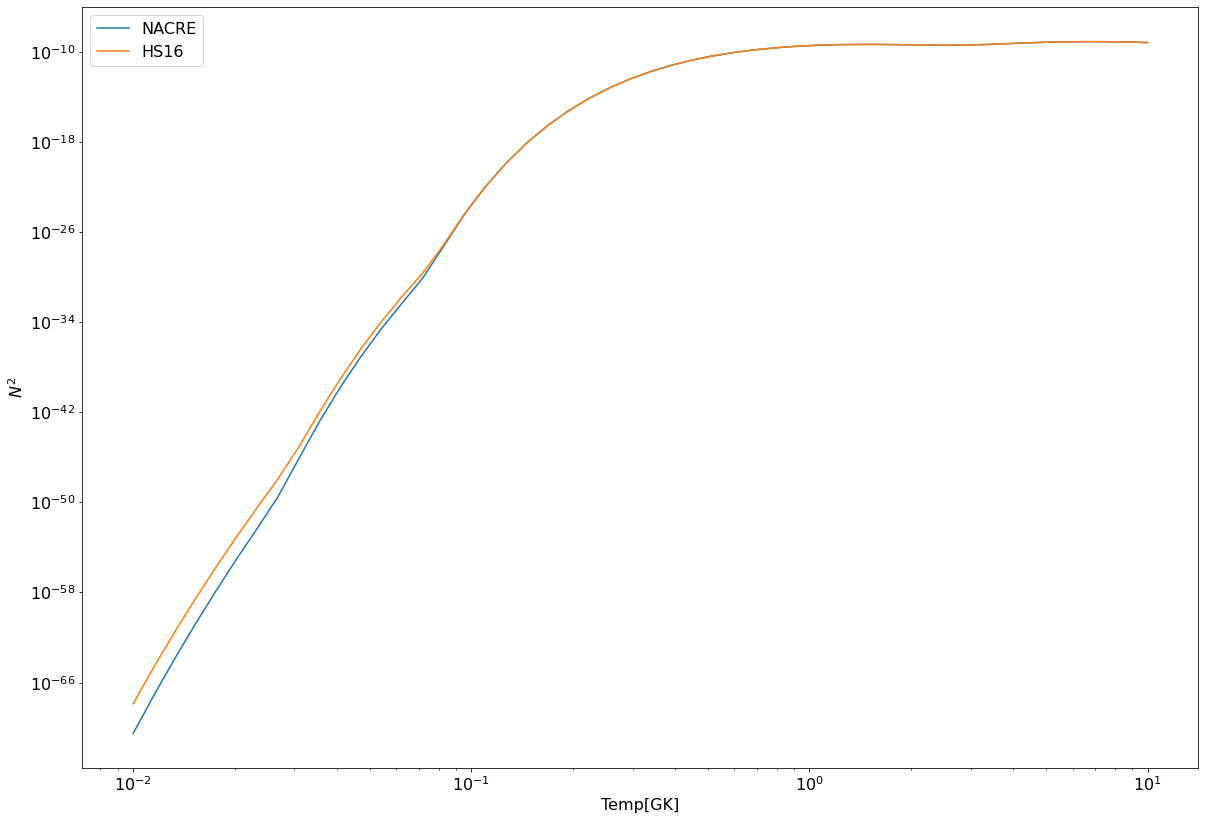

In [28]:
plt.plot(temp,alp99,label='NACRE')
plt.plot(temp,alp16,label='HS16')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Temp[GK]')
plt.ylabel('$N^2$')
plt.legend();

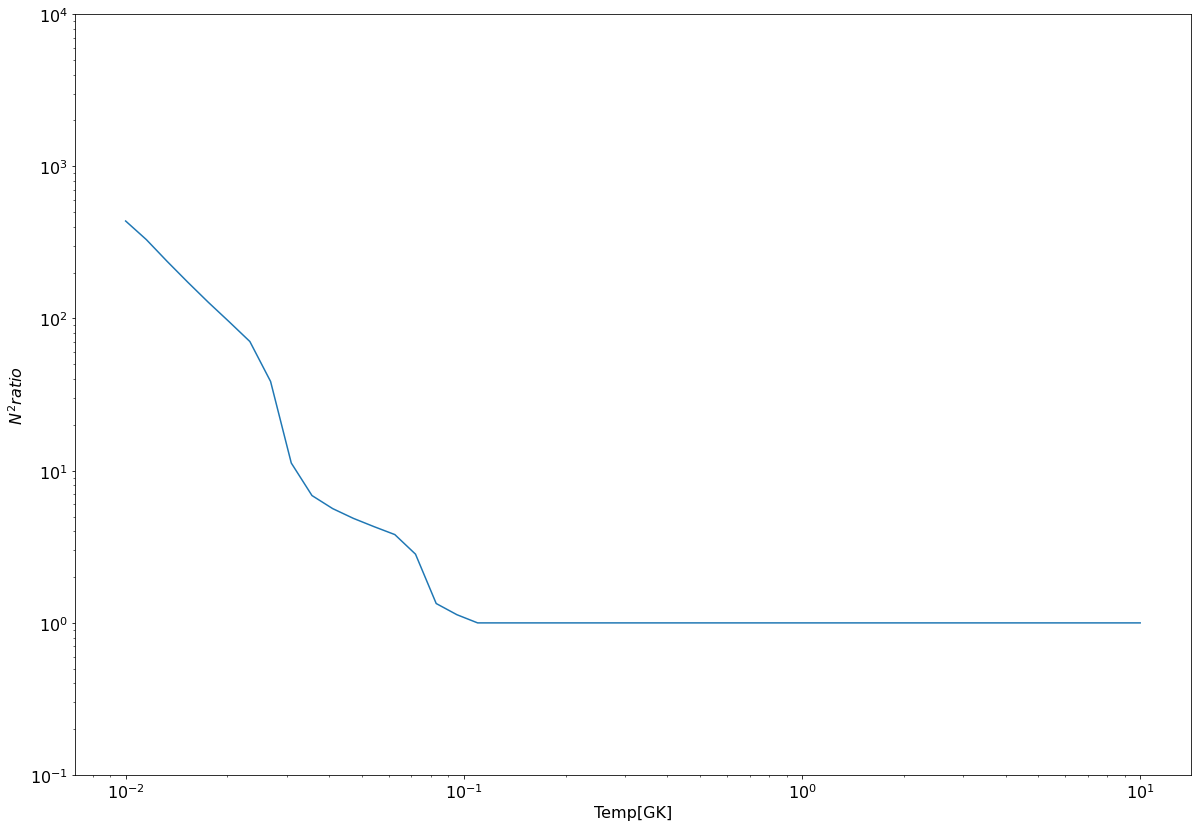

In [29]:
plt.plot(temp,rate)
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.1,10000)
plt.xlabel('Temp[GK]')
plt.ylabel('$N^2 ratio$');

In [21]:
for i in dat['Temp']:
    print('*   {},'.format(i))

*   0.010252511914941151,
*   0.010605203186425502,
*   0.010970027204890627,
*   0.011347401342585842,
*   0.011737757329563784,
*   0.012141541747595585,
*   0.012559216541077112,
*   0.01299125954551045,
*   0.013438165034165594,
*   0.013900444283547342,
*   0.014378626158314754,
*   0.014873257716321909,
*   0.015384904834472484,
*   0.01591415285610398,
*   0.01646160726064226,
*   0.017027894356292553,
*   0.01761366199655933,
*   0.01821958032141484,
*   0.018846342523964103,
*   0.01949466564348372,
*   0.02016529138574135,
*   0.020858986971534828,
*   0.021576546014421192,
*   0.0223187894286402,
*   0.02308656636827069,
*   0.023813542041105758,
*   0.02449427502828399,
*   0.025123556779059284,
*   0.02562415412405829,
*   0.026061169048392188,
*   0.026297283172070918,
*   0.026715641974843617,
*   0.027033773049800862,
*   0.02726332629065457,
*   0.02757243225052821,
*   0.02788504278990218,
*   0.02820119764297468,
*   0.028520936994442067,
*   0.028844301484606438,
* 

In [22]:
for i in dat['ratio']:
    print('*   {},'.format(i))

*   436.86512465780316,
*   402.26583904137095,
*   370.4067826114757,
*   341.070931927865,
*   314.41856603382615,
*   291.18060742287395,
*   268.4268299419939,
*   248.30329913863238,
*   230.2154427043203,
*   213.44521093115142,
*   197.21742537491818,
*   183.06062675720864,
*   170.11487976660231,
*   157.3616388784499,
*   146.40096019569634,
*   136.20372346768335,
*   126.86205231457147,
*   118.025755219771,
*   110.18308699260628,
*   102.62606770477564,
*   95.80669002768816,
*   89.235690573924,
*   83.21067387132223,
*   77.50358501982569,
*   72.10524335143495,
*   66.8526780636346,
*   61.47341638099654,
*   56.29426831913654,
*   51.598748234177314,
*   47.4034060770228,
*   43.70917028308526,
*   39.752386510938436,
*   36.37821764823881,
*   33.61245910843248,
*   30.73830240949814,
*   27.77369403707398,
*   24.92305234292637,
*   22.32658325511538,
*   20.000612805721406,
*   17.97866463471837,
*   16.161123920923483,
*   14.627559542446285,
*   13.28511387755737

In [ ]:
#01/11/21

In [25]:
plt.matplotlib.rcParams['figure.figsize'] = (15,15)
plt.matplotlib.rcParams['font.size'] = 30
import os

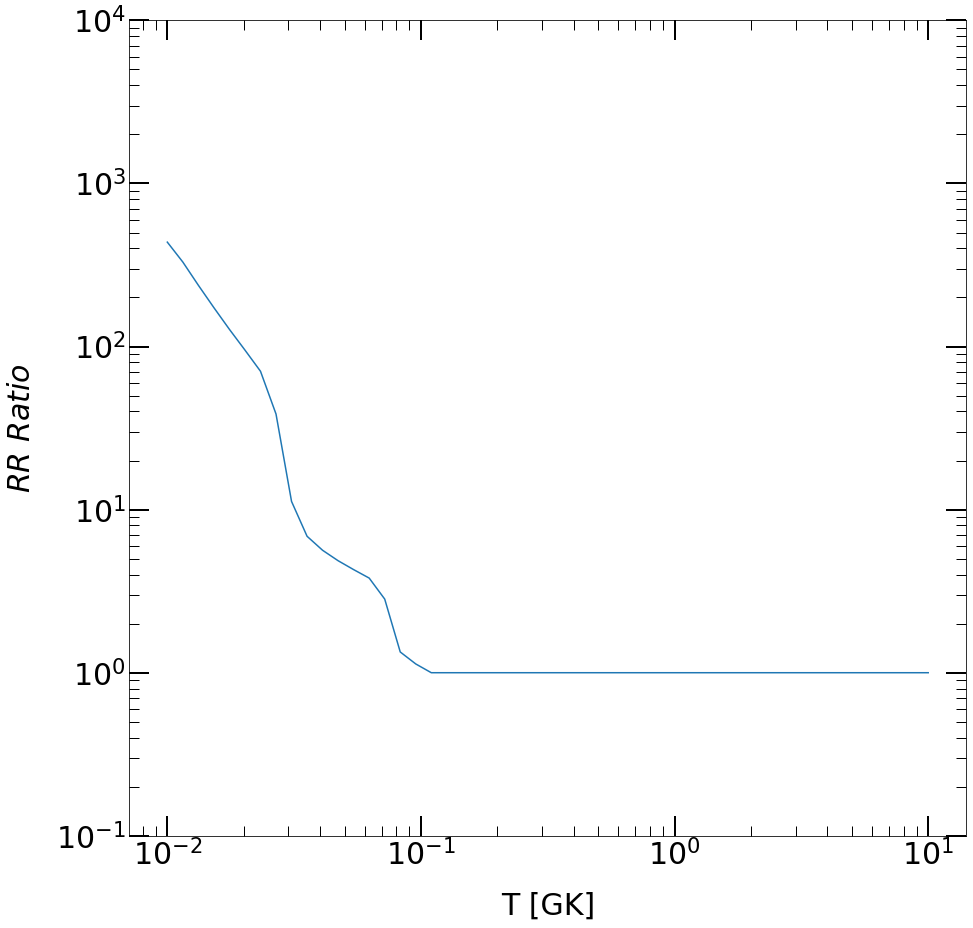

In [29]:
plt.plot(temp,rate)
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.1,10000)
plt.xlabel('T [GK]',labelpad=20)
plt.ylabel('$RR~Ratio$',labelpad=20)
plt.tick_params(direction='in',length=20,width=2,which='major',bottom=True,top=True,left=True,right=True)
plt.tick_params(direction='in',length=10,width=1,which='minor',bottom=True,top=True,left=True,right=True);
os.chdir('/home/zookeeper/Desktop/Plots/Paper')
plt.savefig('Triple_Alpha_Rate_Ratio.png')